## **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Explore Dataset**

In [ ]:
# path to the dataset directory
base_dir = '/content/drive/MyDrive/capstone'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# count images in the directory
def count_images_in_directory(directory):
    total_images = 0
    for _, _, filenames in os.walk(directory):
        total_images += len(filenames)
    return total_images

dataset_count = count_images_in_directory(base_dir)
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)
test_count = count_images_in_directory(test_dir)

print(f"Total dataset: {dataset_count} images")
print(f"Training data: {train_count} images")
print(f"Validation data: {val_count} images")
print(f"Testing data: {test_count} images")

Total dataset: 1100 images
Training data: 880 images
Validation data: 110 images
Testing data: 110 images


In [ ]:
# count images per label in the directory
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            total_images_in_label = len(os.listdir(label_path))
            label_counts[label] = total_images_in_label
    return label_counts

train_label_counts = count_images_per_label(train_dir)
val_label_counts = count_images_per_label(val_dir)
test_label_counts = count_images_per_label(test_dir)

print(f"Total of labels in training data: {len(train_label_counts)}")
for label, count in train_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in validation data: {len(val_label_counts)}")
for label, count in val_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in testing data: {len(test_label_counts)}")
for label, count in test_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

Total of labels in training data: 11
Label: nasal_discharge, Count: 80 images
Label: pyoderma, Count: 80 images
Label: eyelid_lump, Count: 80 images
Label: ringworm, Count: 80 images
Label: keratosis, Count: 80 images
Label: scabies, Count: 80 images
Label: flea_allergy, Count: 80 images
Label: entropion, Count: 80 images
Label: leprosy, Count: 80 images
Label: conjuntivis, Count: 80 images
Label: ear_mites, Count: 80 images

Total of labels in validation data: 11
Label: scabies, Count: 10 images
Label: ringworm, Count: 10 images
Label: ear_mites, Count: 10 images
Label: flea_allergy, Count: 10 images
Label: leprosy, Count: 10 images
Label: eyelid_lump, Count: 10 images
Label: pyoderma, Count: 10 images
Label: entropion, Count: 10 images
Label: nasal_discharge, Count: 10 images
Label: keratosis, Count: 10 images
Label: conjuntivis, Count: 10 images

Total of labels in testing data: 11
Label: pyoderma, Count: 10 images
Label: ringworm, Count: 10 images
Label: nasal_discharge, Count: 10 

In [ ]:
# list files in training data
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/capstone/train/nasal_discharge/images (4).jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-34-_jpg.rf.cdc42794cdcf31514ee710e5a6f17f69.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/images (7).jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-75-_jpg.rf.6740f931e059fd51982a34798e083a37.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-90-_jpg.rf.473f19c00eaab39ba31c5c3dc772cad8.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-96-_jpg.rf.4dd48b4a845689626f502b8a14dd1132.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-87-_jpg.rf.ab44a46f8b47d118dbed2c41418ee506.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/nasal_discharge_local-93-_jpg.rf.882426f9cdf90286c4dca5cae11bcbe6.jpg
/content/drive/MyDrive/capstone/train/nasal_discharge/images (10).jpg
/content/drive/MyDrive/capstone/train/nasal_disc

In [ ]:
# list files in validation data
for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/capstone/validation/scabies/Image_10-3-_jpg.rf.2b24813fe018956e99465c222342728a.jpg
/content/drive/MyDrive/capstone/validation/scabies/Image_44-2-_jpg.rf.2d277e477d7300f2d3bb05765ec7fce4.jpg
/content/drive/MyDrive/capstone/validation/scabies/images (3).jpg
/content/drive/MyDrive/capstone/validation/scabies/scabies_122_png.rf.fa764276c798f7b1fa3c87e6057e4443.jpg
/content/drive/MyDrive/capstone/validation/scabies/Image_33-3-_jpg.rf.0deb90e5a64c700ec6cf6e43c99705ed.jpg
/content/drive/MyDrive/capstone/validation/scabies/scabies_124_png.rf.b1f2dd2a546359526dc5126dd754c1ff.jpg
/content/drive/MyDrive/capstone/validation/scabies/Image_12_jpg.rf.6a363d887f5a6ca3ec89a3e5f5a94884.jpg
/content/drive/MyDrive/capstone/validation/scabies/Image_25_jpg.rf.3bb7dceced83348265c1e25c13287d96.jpg
/content/drive/MyDrive/capstone/validation/scabies/image-asset.jpeg
/content/drive/MyDrive/capstone/validation/scabies/scabies_125_png.rf.5e27037cd8b2b42921dbaaf014ad36a0.jpg
/content/drive/M

In [ ]:
# list files in test data
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/capstone/test/pyoderma/image9.jpg
/content/drive/MyDrive/capstone/test/pyoderma/image2.jpg
/content/drive/MyDrive/capstone/test/pyoderma/image8.jpg
/content/drive/MyDrive/capstone/test/pyoderma/Copy-of-pyd_2_jpg.rf.ab934ed721475359817e5f1140a3fef0.jpg
/content/drive/MyDrive/capstone/test/pyoderma/image1.jpg
/content/drive/MyDrive/capstone/test/pyoderma/image3.jpg
/content/drive/MyDrive/capstone/test/pyoderma/pyodermaNasal241.jpg
/content/drive/MyDrive/capstone/test/pyoderma/Copy-of-pyd_0_jpg.rf.28ecf141026ef77dd704cd3b5a1b42c3.jpg
/content/drive/MyDrive/capstone/test/pyoderma/pyodermaNasal251.jpg
/content/drive/MyDrive/capstone/test/pyoderma/Copy-of-pyd_1_jpg.rf.0eb85292291194a4f00fce06e7769702.jpg
/content/drive/MyDrive/capstone/test/ringworm/image_83_jpg.rf.4359f6dc558437c916a34ba5bde74f78.jpg
/content/drive/MyDrive/capstone/test/ringworm/1000010696_x4_jpg.rf.4a77ab6c3f94601249e4e815f327dd7a.jpg
/content/drive/MyDrive/capstone/test/ringworm/Image_65_jpg.rf.b298

## **Preprocessing Data**

In [ ]:
# batch size and image size
batch_size = 16
img_height = 224
img_width = 224

# define augmentation and normalization parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

# define normalization parameters for validation and testing data
val_test_datagen = ImageDataGenerator(
    rescale=1.0/255
  )

# load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123
  )

# load validation data
val_data = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

# load testing data
test_data = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

Found 880 images belonging to 11 classes.
Found 110 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [ ]:
# get the first batch of images and labels
iterator = iter(train_data)
images, labels = next(iterator)

# display the first batch information
print(f"Shape of batch of images: {images.shape}")
print(f"Shape of batch of labels: {labels.shape}")

Shape of batch of images: (16, 224, 224, 3)
Shape of batch of labels: (16, 11)


Training images with labels:


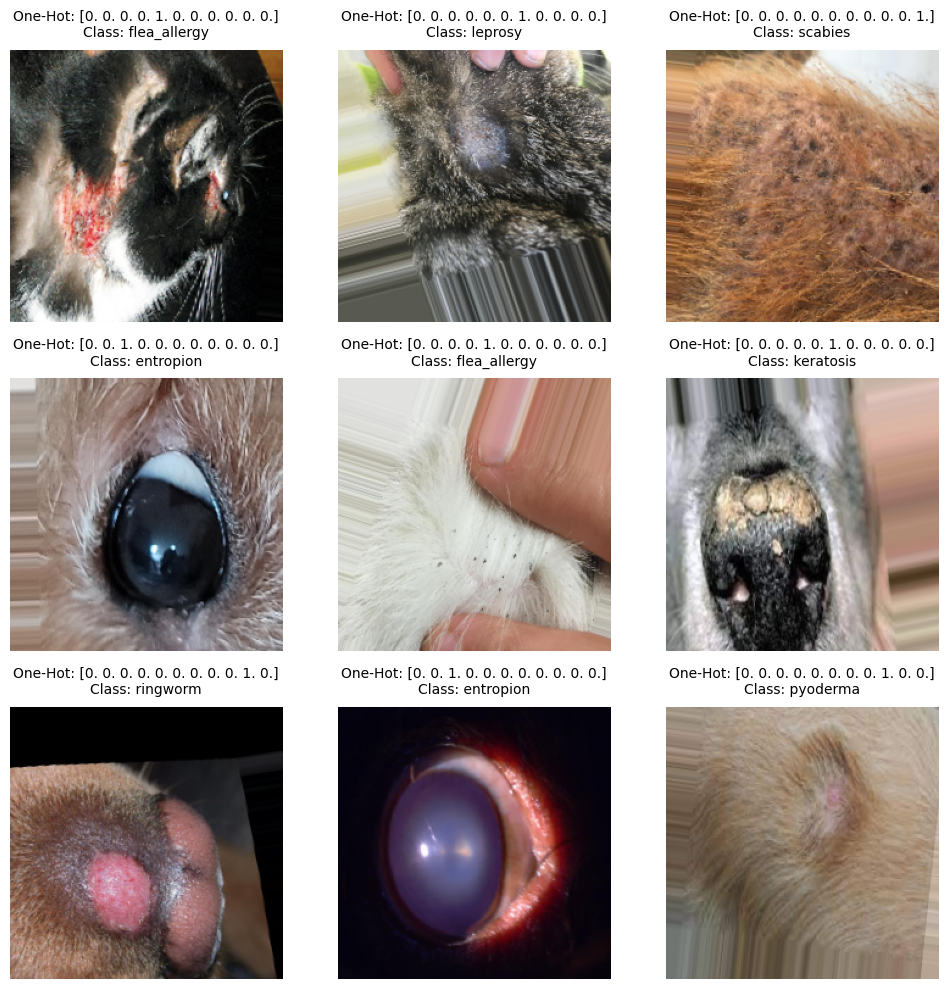


Validation images with labels:


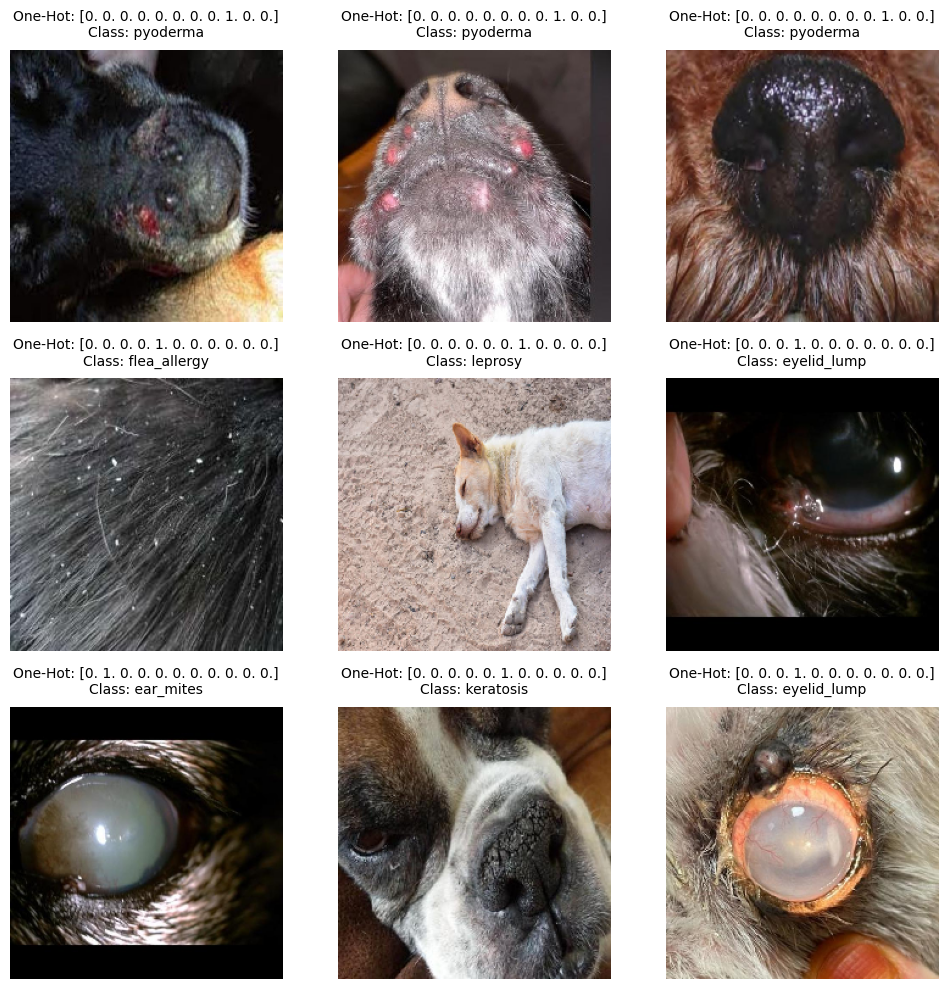


Testing images with labels:


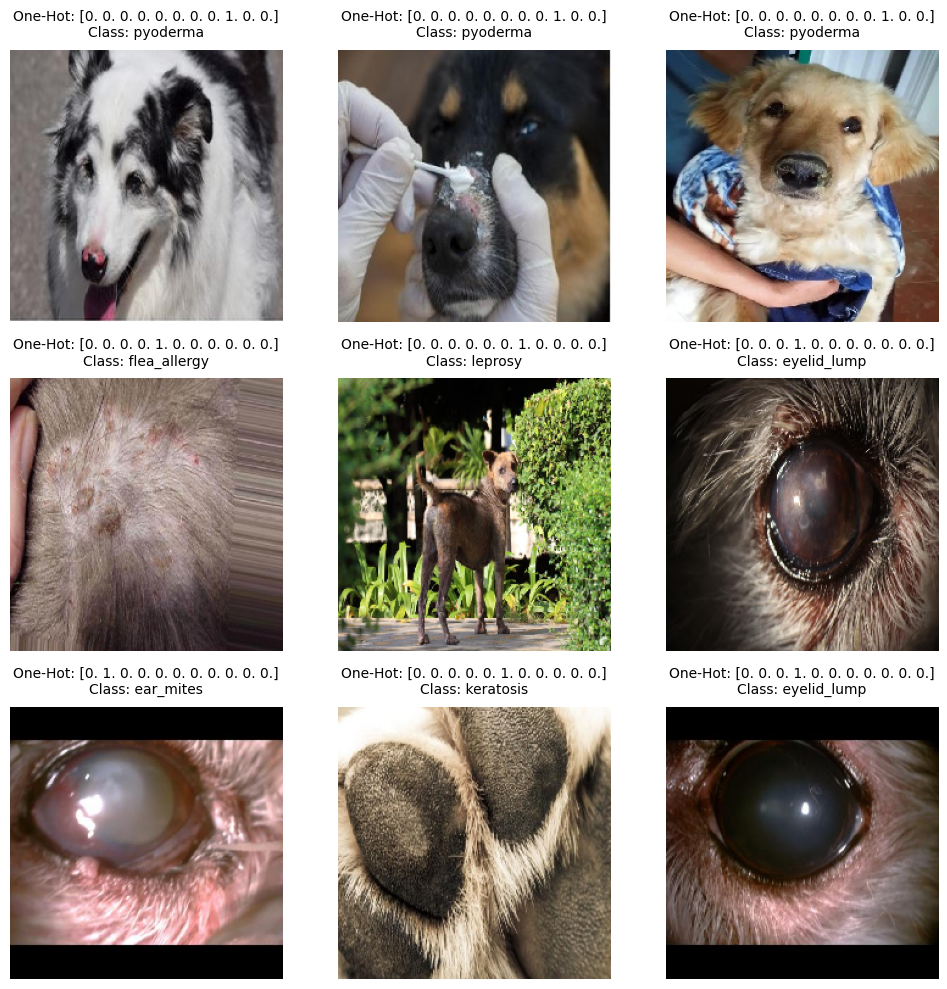

In [ ]:
# display the image along with the label
def display_images_with_labels(data, num_images=9):
    # take the first batch
    images, labels = next(data)

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # display one-hot encoding
        one_hot_label = labels[i]
        # display the class name based on one-hot encoding
        class_index = np.argmax(one_hot_label)
        class_name = list(data.class_indices.keys())[class_index]

        # combine one-hot encoding and class name
        plt.title(f"One-Hot: {one_hot_label}\nClass: {class_name}", fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

print("Training images with labels:")
display_images_with_labels(train_data)

print("\nValidation images with labels:")
display_images_with_labels(val_data)

print("\nTesting images with labels:")
display_images_with_labels(test_data)

## **Modeling**

ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# load ResNet50 without top layer (fully connected layer)
base_model = ResNet50(
    weights='imagenet',  
    include_top=False,    
    input_shape=(224, 224, 3)  
)

# freeze all layers in the base model
base_model.trainable = False

# add custom model
x = base_model.output

# flatten features
x = Flatten()(x)

# add fully connected and dropout layers
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# add an additional fully connected layer
x = Dense(64, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# output layer 
output = Dense(11, activation='softmax')(x)

# create model
model = Model(inputs=base_model.input, outputs=output)

# compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# prepare for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 482s 8s/step - accuracy: 0.0927 - loss: 3.1410 - val_accuracy: 0.0909 - val_loss: 2.9644
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 274s 5s/step - accuracy: 0.1095 - loss: 3.1175 - val_accuracy: 0.1000 - val_loss: 2.8904
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 301s 5s/step - accuracy: 0.1180 - loss: 2.9045 - val_accuracy: 0.0818 - val_loss: 4.0636
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.1140 - loss: 2.9326 - val_accuracy: 0.0818 - val_loss: 3.1960
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.1492 - loss: 2.8114 - val_accuracy: 0.1182 - val_loss: 4.3492
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.1372 - loss: 2.9056 - val_accuracy: 0.1455 - val_loss: 3.0093
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.1387 - loss: 2.8977 - val_accuracy: 0.1909 - val_loss: 4.0452
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.1247 - loss: 2.7511 - val_accuracy: 0.1455 - val_loss: 3.